In [1]:
import sys
sys.path.insert(0, '../src')

from environment import Environment
from integersolution import integer_solution
from utils import *

from itertools import zip_longest
import time
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["figure.facecolor"] = "white" # set to white the background behind axes and labels

In [3]:
# to save variables on file along to way
# (Notice: the calculations are sometimes very long. We should minimize the risk of losing information)
SAVE_FOLDER = "./saved_results/hotel_example/"
import os
os.makedirs(SAVE_FOLDER, exist_ok=True)

# the base modules
module = "battle_creekhs_1"

matrices = [get_building_matrix(module)]

# Varying number of modules
Fixed connection distance at = 20  
Fixed number of robots at 10

In [4]:
CONNECTION_DISTANCE = 20
mod_m = 10

In [5]:
mod_modules_visited = []
mod_tours = []
mod_max_len = []
mod_time = []
mod_avg_len = []
mod_std_len = []

mod_step=2
mod_R=list(range(10,101,mod_step))

for number_of_modules in mod_R:
    modules_sequence = [0]*number_of_modules
    distances = [CONNECTION_DISTANCE]*(number_of_modules-1)
    env = Environment(matrices, modules_sequence, distances)
    
    mod_start_time = time.time()
    mod_tours = integer_solution(env, mod_m)
    
    mod_end_time = time.time()
    
    mod_avg_len.append( avg_length(mod_tours, env) )
    mod_max_len.append( max_length(mod_tours, env)[0] )
    mod_std_len.append( std_length(mod_tours, env) )
    mod_modules_visited.append( count_modules(mod_tours, env) )
    
    mod_time.append(mod_end_time - mod_start_time)

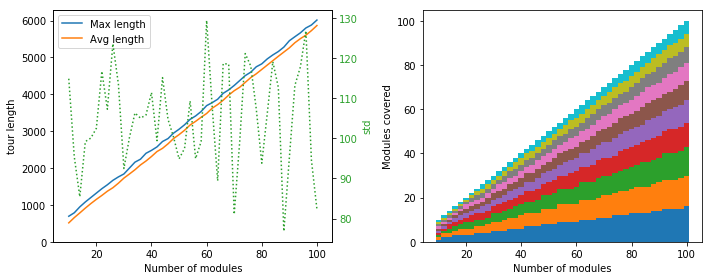

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
fig.set_size_inches(10, 4)

#### Makespan plot ####
ax1.set_ylabel('tour length')
ax1.set_xlabel('Number of modules')
max_plot, = ax1.plot(mod_R, mod_max_len)
avg_plot, = ax1.plot(mod_R, mod_avg_len)
ax1.set_ylim(bottom=0)

ax1.legend((max_plot, avg_plot), ("Max length", "Avg length"))

ax1b = ax1.twinx() 

color = 'tab:green'
ax1b.set_ylabel('std', color=color)
ax1b.plot(mod_R, mod_std_len, ':', color=color)
ax1b.tick_params(axis='y', labelcolor=color)
#### End makespan plot ####


#### Modules covered plot ####
ax2.set_ylabel('Modules covered')
ax2.set_xlabel('Number of modules')

top = np.zeros(len(mod_modules_visited))

modules_covered_list = list(zip_longest(*mod_modules_visited, fillvalue=0))

for n in modules_covered_list:
    ax2.bar(mod_R, n, bottom=top, width=mod_step, alpha=1)
    top += n
#### End modules covered plot ####

fig.tight_layout()
fig.savefig(SAVE_FOLDER+"varying_N.png")

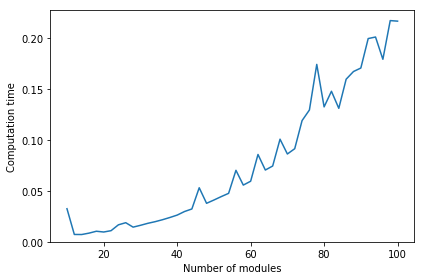

In [7]:
fig, ax1 = plt.subplots()

ax1.set_ylabel('Computation time')
ax1.set_xlabel('Number of modules')
ax1.plot(mod_R, mod_time)
ax1.set_ylim(bottom=0)
fig.tight_layout()
fig.patch.set_facecolor('white')

fig.savefig(SAVE_FOLDER+"runtime_varying_N.png")

# Varying number of robots
Fixed connection distance  
Fixed number of modules

In [8]:
CONNECTION_DISTANCE = 20
rob_number_of_modules = 30

In [9]:
rob_modules_visited = []
rob_max_len = []
rob_time = []
rob_avg_len = []
rob_std_len = []

rob_step=1
rob_R=list(range(1,rob_number_of_modules+1,rob_step))

for m in rob_R:
    modules_sequence = [0]*rob_number_of_modules
    distances = [CONNECTION_DISTANCE]*(rob_number_of_modules-1)
    env = Environment(matrices, modules_sequence, distances)
    
    rob_start_time = time.time()
    rob_tours = integer_solution(env, m)
    rob_end_time = time.time()
    
    rob_avg_len.append( avg_length(rob_tours, env) )
    rob_max_len.append( max_length(rob_tours, env)[0] )
    rob_std_len.append( std_length(rob_tours, env) )
    rob_modules_visited.append( count_modules(rob_tours, env) )
    
    rob_time.append(rob_end_time - rob_start_time)

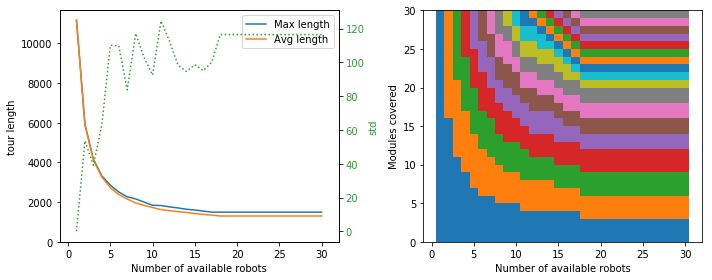

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2,sharex=True)
fig.set_size_inches(10, 4)

ax1.set_ylabel('tour length')
ax1.set_xlabel('Number of available robots')
max_plot, = ax1.plot(rob_R, rob_max_len)
avg_plot, = ax1.plot(rob_R, rob_avg_len)
ax1.set_ylim(bottom=0)

ax1.legend((max_plot, avg_plot), ("Max length", "Avg length"))

ax1b = ax1.twinx() 

color = 'tab:green'
ax1b.set_ylabel('std', color=color)
ax1b.plot(rob_R, rob_std_len, ':', color=color)
ax1b.tick_params(axis='y', labelcolor=color)
#### End makespan plot ####


#### Modules covered plot ####
ax2.set_ylabel('Modules covered')
ax2.set_xlabel('Number of available robots')

top = np.zeros(len(rob_modules_visited))

modules_covered_list = list(zip_longest(*rob_modules_visited, fillvalue=0))

for n in modules_covered_list:
    ax2.bar(rob_R, n, bottom=top, width=rob_step)
    top += n
#### End modules covered plot ####

fig.tight_layout()
fig.savefig(SAVE_FOLDER+"varying_m.png")

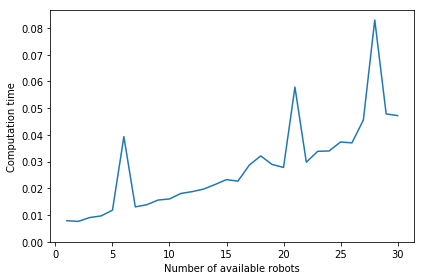

In [11]:
fig, ax1 = plt.subplots()

ax1.set_ylabel('Computation time')
ax1.set_xlabel('Number of available robots')
ax1.plot(rob_R, rob_time)
ax1.set_ylim(bottom=0)
fig.tight_layout()

fig.savefig(SAVE_FOLDER+"runtime_varying_m.png")

# Varying connection distance
Fixed number of robots = 10  
Fixed number of modules at 40

In [12]:
dist_m = 10
dist_number_of_modules = 40

In [13]:
dist_modules_visited = []
dist_tours = []
dist_max_len = []
dist_time = []
dist_avg_len = []
dist_std_len = []

dist_step=2
dist_R=list(range(0,51,dist_step))

for connection_distance in dist_R:
    modules_sequence = [0]*dist_number_of_modules
    distances = [connection_distance]*(dist_number_of_modules-1)
    env = Environment(matrices, modules_sequence, distances)
    
    dist_start_time = time.time()
    dist_tours = integer_solution(env, dist_m)
    
    dist_end_time = time.time()
    
    dist_avg_len.append( avg_length(dist_tours, env) )
    dist_max_len.append( max_length(dist_tours, env)[0] )
    dist_std_len.append( std_length(dist_tours, env) )
    dist_modules_visited.append( count_modules(dist_tours, env) )
    
    dist_time.append(dist_end_time - dist_start_time)

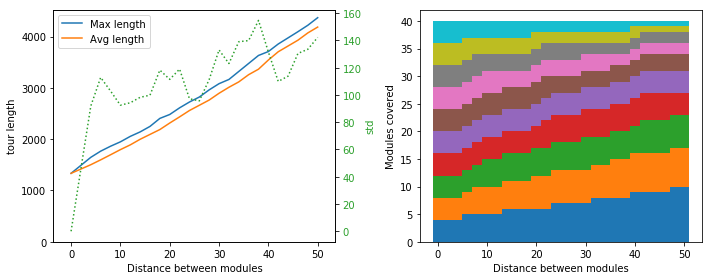

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2,sharex=True)
fig.set_size_inches(10, 4)

ax1.set_ylabel('tour length')
ax1.set_xlabel('Distance between modules')
max_plot, = ax1.plot(dist_R, dist_max_len)
avg_plot, = ax1.plot(dist_R, dist_avg_len)
ax1.set_ylim(bottom=0)

ax1.legend((max_plot, avg_plot), ("Max length", "Avg length"))

ax1b = ax1.twinx() 

color = 'tab:green'
ax1b.set_ylabel('std', color=color)
ax1b.plot(dist_R, dist_std_len, ':', color=color)
ax1b.tick_params(axis='y', labelcolor=color)
#### End makespan plot ####


#### Modules covered plot ####
ax2.set_ylabel('Modules covered')
ax2.set_xlabel('Distance between modules')

top = np.zeros(len(dist_modules_visited))

modules_covered_list = list(zip_longest(*dist_modules_visited, fillvalue=0))

for n in modules_covered_list:
    ax2.bar(dist_R, n, bottom=top, width=dist_step)
    top += n
#### End modules covered plot ####

fig.tight_layout()

fig.savefig(SAVE_FOLDER+"varying_dist.png")

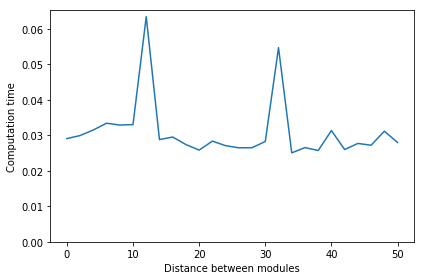

In [15]:
fig, ax1 = plt.subplots()

ax1.set_ylabel('Computation time')
ax1.set_xlabel('Distance between modules')
ax1.plot(dist_R, dist_time)
ax1.set_ylim(bottom=0)
fig.tight_layout()
fig.savefig(SAVE_FOLDER+"runtime_varying_dist.png")